In [1]:
ColabNotebook = 'google.colab' in str(get_ipython())

if ColabNotebook:
    # monta G-drive en entorno COLAB
    from google.colab import drive
    drive.mount('/content/drive/')
    DATOS = '/content/drive/MyDrive/Colab Notebooks/DATOS/Data/'
else:
    DATOS = 'D:/DATA/'

In [2]:
import numpy as np
import tensorflow.keras
from tensorflow.keras.layers import Dense
from tensorflow.keras.models import Sequential
from tensorflow import random

#from tensorflow.keras.applications.vgg16 import VGG16
from tensorflow.keras.preprocessing.image import load_img
from tensorflow.keras.preprocessing.image import img_to_array
#from tensorflow.keras.preprocessing.image import ImageDataGenerator
#from tensorflow.keras.applications.vgg16 import preprocess_input
#from tensorflow.keras.applications.vgg16 import decode_predictions
import tensorflow as tf


Cargar el modelo 

In [3]:
from tensorflow.keras.models import load_model

classifier = load_model(DATOS+'car-flower-classifier.keras')

Vusualizando la arquitectura del modelo

In [4]:
classifier.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 block1_conv1 (Conv2D)       (None, 224, 224, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 224, 224, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 112, 112, 64)      0         
                                                                 
 block2_conv1 (Conv2D)       (None, 112, 112, 128)     73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 112, 112, 128)     147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 56, 56, 128)       0         
                                                                 
 block3_conv1 (Conv2D)       (None, 56, 56, 256)       2

Predicción de una nueva imagen



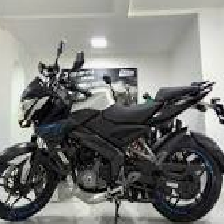

In [11]:
#auto_01.jpg - flores_01.jpg - TV.jpg - flores_01.jpg - moto_01.png
new_image = load_img(DATOS+'Prediction/moto_01.png', target_size = (224, 224))
new_image

### Etiquetas de clase

Los valores de clase son los siguientes: **'car': 0**, **'flower': 1**

### Haciendo la predicción

In [12]:
new_image = img_to_array(new_image)
new_image = np.expand_dims(new_image, axis = 0)
result = classifier.predict(new_image)
print('predicción: ',result[0][0])

if result[0][0] > 0.5:
    prediction = 'It is a flower'
else:
    prediction = 'It is a car'

print(prediction)

1/1 [==============================] - 0s 289ms/step
predicción:  0.0006106796
It is a car
